<a href="https://colab.research.google.com/github/saboo-vivek/Data-Science/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Importing the dataset

In [3]:
iris=datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
X = dataset.iloc[:, [0,1,2,3]].values
dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using the elbow method to find the optimal number of clusters

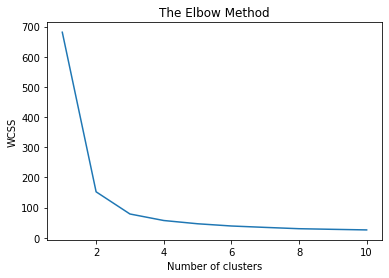

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

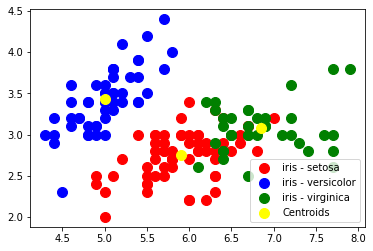

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'iris - setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'iris - versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'iris - virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of Species')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
plt.legend()
plt.show()